In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']=(12,12)
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# LOAD AND VIEW DATASET

In [2]:
stroke_df=pd.read_csv("stroke.csv")
print(stroke_df.shape)
stroke_df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#drop id column as it seems to be irrevelent
stroke_df.drop(columns='id',inplace=True)

In [5]:
stroke_df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


# Descriptive statistics

In [6]:
stroke_df.shape

(5110, 11)

In [7]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#As in above information we can see that there are some missing values

In [8]:
#descriptive statistics
stroke_df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [9]:
#Now we check for statistics of numerical columns
round(stroke_df.describe(),2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.1,0.05,106.15,28.89,0.05
std,22.61,0.3,0.23,45.28,7.85,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


In [10]:
#in this, we are going to check for categorical columns
round(stroke_df.describe(exclude=['int64','float64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [11]:
#list of all the columns of our dataset
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Data Wrangling

#checking for missing values

In [12]:
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

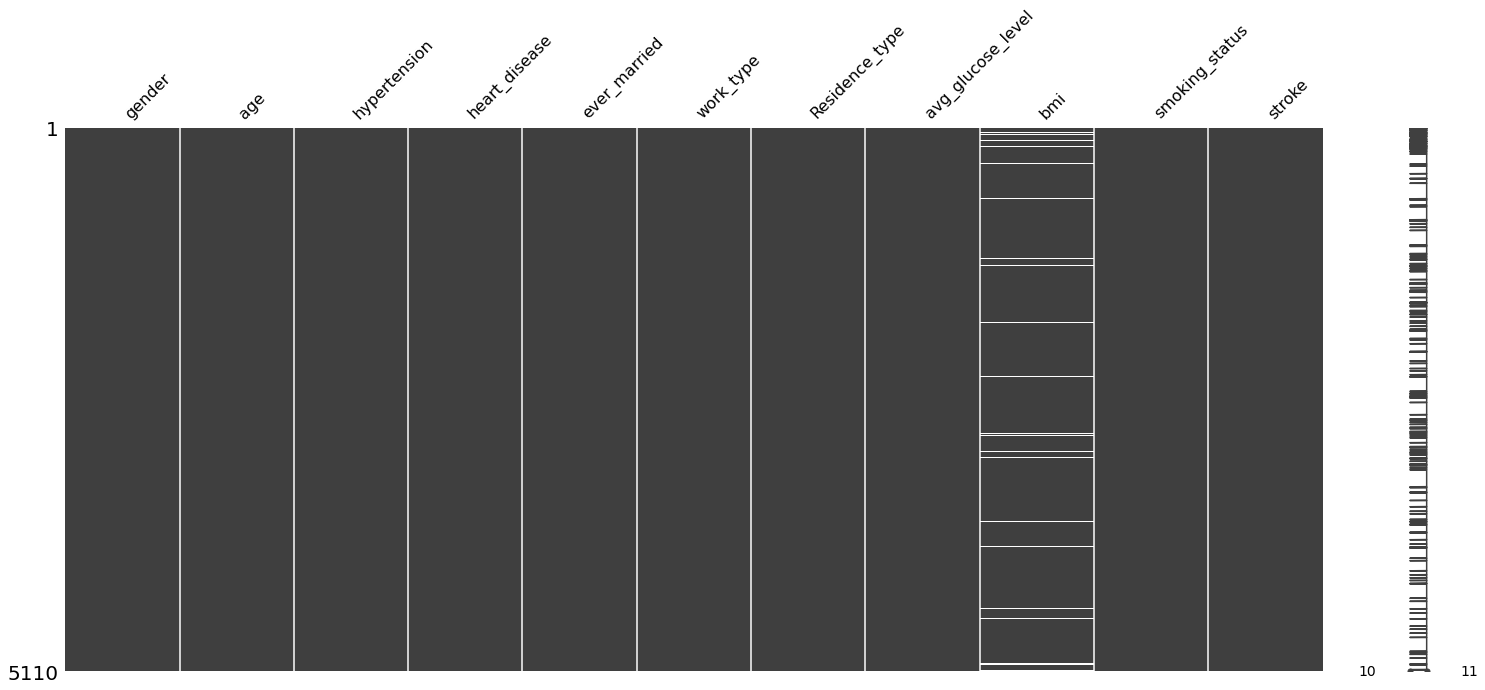

In [13]:
#only bmi is containing missing values 
#lets visualize the missing value
msno.matrix(stroke_df)

In [14]:
#Now we need to treat these missing values
# we will replace the missing values with mean
stroke_df['bmi'].replace(np.NaN,stroke_df['bmi'].mean(),inplace=True)

In [15]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
#Now as we are seeing there are no NUll values in dataset
#Now we check for duplicates
stroke_df.duplicated().sum()

0

In [18]:
#Hence there is no duplicates in dataset
#let's check for unique values in all the column
unique_values={}

for col in stroke_df.columns:
    unique_values[col]=stroke_df[col].unique().shape[0]
    
pd.DataFrame(unique_values,index=['NO. of unique values'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
NO. of unique values,3,104,2,2,2,5,2,3979,419,4,2


In [19]:
#Now we will see the unique values of some specific columns

columns=['gender','ever_married','work_type','Residence_type','smoking_status']

for column in columns:
    unique_values=stroke_df[column].unique()
    print(f"Unique values for {column}:{unique_values}")

Unique values for gender:['Male' 'Female' 'Other']
Unique values for ever_married:['Yes' 'No']
Unique values for work_type:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values for Residence_type:['Urban' 'Rural']
Unique values for smoking_status:['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [20]:
#Now lets get the counts for each category of gender

stroke_df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [21]:
#Since there is only single entry in other category of gender so we can add this entry in male category
stroke_df['gender']=stroke_df['gender'].replace('Other','Male')
stroke_df['gender'].value_counts()

gender
Female    2994
Male      2116
Name: count, dtype: int64

In [22]:
#Check for multicollinearity
#check for correlation among the numerical columns
correlation=stroke_df.select_dtypes('number').corr()
correlation

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<AxesSubplot:>

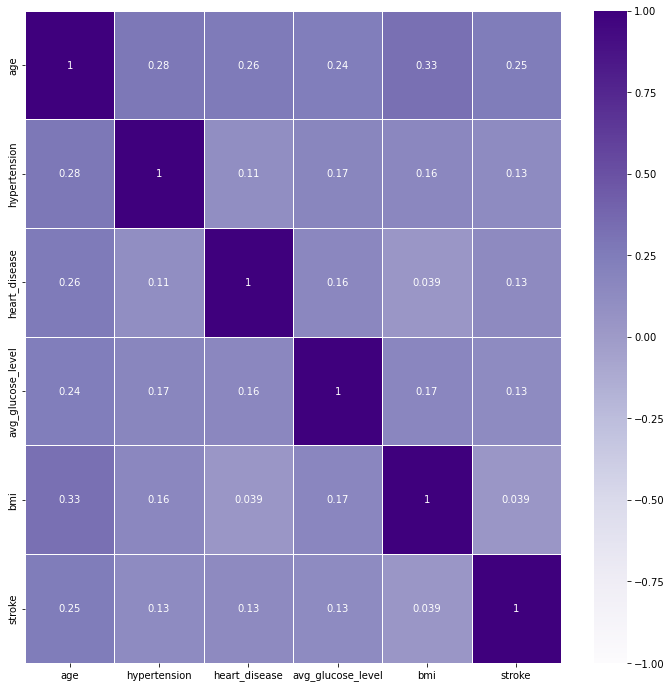

In [23]:
#Visualise the correlation
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap='Purples',linewidth=1)

<Figure size 7560x5760 with 0 Axes>

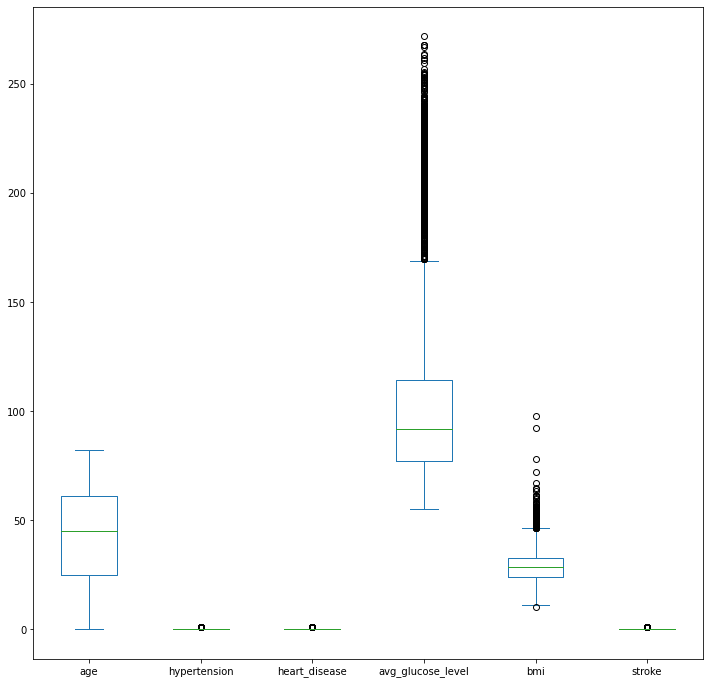

In [24]:
#there is no noteworthy correlation
#lets check for outliers

plt.figure(num=None,figsize=(8.4,6.4),dpi=900,facecolor='w',edgecolor="Blue")
stroke_df.plot(kind='box')
plt.show()

In [25]:
#As we see there are outliers in avg_glucose_level and bmi columns
stroke_df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [26]:
(stroke_df['avg_glucose_level']>125).value_counts()

avg_glucose_level
False    4110
True     1000
Name: count, dtype: int64

In [27]:
stroke_df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [28]:
(stroke_df['bmi']>30).value_counts()

bmi
False    3217
True     1893
Name: count, dtype: int64

#We are going to keep our outliers 

# Feature Engineering

In [29]:
#Creating age group categories
print(f'Maximum age variable:{stroke_df["age"].max()}')
print(f'Minimum age variable:{stroke_df["age"].min()}')
print(f'Number of age variable:{stroke_df["age"].nunique()}')

Maximum age variable:82.0
Minimum age variable:0.08
Number of age variable:104


In [30]:
#Collapse age into fewer groups
ranges=[0,13,18,45,60,100]
group_names=['Children','Teens','Adults','Mid-Adults','Elderly']
stroke_df['age_group']=pd.cut(stroke_df['age'],bins=ranges,labels=group_names)
stroke_df['age_group'].unique()

['Elderly', 'Mid-Adults', 'Adults', 'Children', 'Teens']
Categories (5, object): ['Children' < 'Teens' < 'Adults' < 'Mid-Adults' < 'Elderly']

In [31]:
#Grouping BMI
print(f'Maximum bmi variable: {stroke_df["bmi"].max()}')
print(f'Minimum bmi variable: {stroke_df["bmi"].min()}')
print(f'No of bmi variable: {stroke_df["bmi"].nunique()}')

Maximum bmi variable: 97.6
Minimum bmi variable: 10.3
No of bmi variable: 419


In [32]:
#collapse bmi into fewer groups
ranges=[0,19,25,30,100]
group_names=['Underweight','Normal','Overweight','Obesity']
stroke_df['bmi_group']=pd.cut(stroke_df['bmi'],bins=ranges,labels=group_names)
stroke_df['bmi_group'].unique()

['Obesity', 'Overweight', 'Normal', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obesity']

In [33]:
#Grouping avg_glucose_level
print(f'Maximum avg_glucose_level variable: {stroke_df["avg_glucose_level"].max()}')
print(f'Minimum avg_glucose_level variable: {stroke_df["avg_glucose_level"].min()}')
print(f'No of avg_glucose_level variable: {stroke_df["avg_glucose_level"].nunique()}')

Maximum avg_glucose_level variable: 271.74
Minimum avg_glucose_level variable: 55.12
No of avg_glucose_level variable: 3979


In [34]:
ranges=[0,70,99,125,280]
group_names=['Low','Normal','High','Very_high']
stroke_df['glucose_level_group']=pd.cut(stroke_df['avg_glucose_level'],bins=ranges,labels=group_names)
stroke_df['glucose_level_group'].unique()

['Very_high', 'High', 'Normal', 'Low']
Categories (4, object): ['Low' < 'Normal' < 'High' < 'Very_high']

# EDA

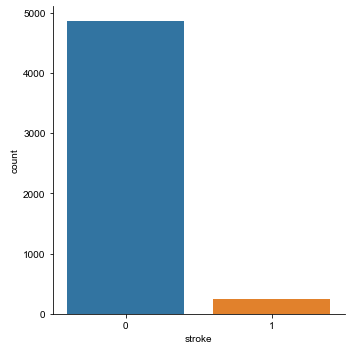

In [35]:
#lets visualise the stroke cloumn to get the sense of our target variable
sns.catplot(data=stroke_df,x='stroke',kind='count')
sns.set_style('white')
plt.show()

In [36]:
stroke_df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [38]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,glucose_level_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Elderly,Obesity,Very_high
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Elderly,Overweight,Very_high
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Elderly,Obesity,High
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Mid-Adults,Obesity,Very_high
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Elderly,Normal,Very_high


In [39]:
#we can see our data is not balanced 
#Relationship bw age and stroke
#lets visualise the upper said relation
stroke=stroke_df[stroke_df['stroke']==1]


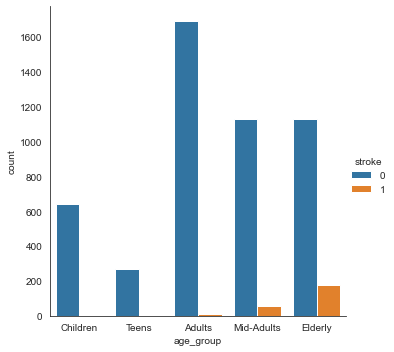

In [40]:
sns.catplot(data=stroke_df,x="age_group",hue='stroke',kind='count')
sns.set_style('white')
plt.show()

#Now to visualise the relationship bw bmi and stroke

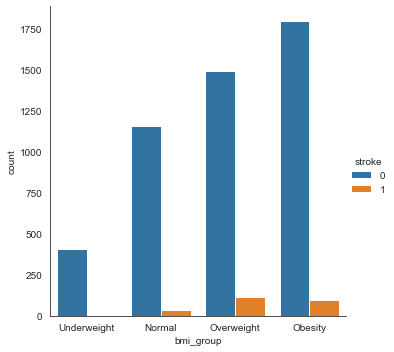

In [41]:
sns.catplot(data=stroke_df,x="bmi_group",hue='stroke',kind='count')
sns.set_style('white')
plt.show()

#Now to visualise the realtionship bw avg_glucose_level and stroke

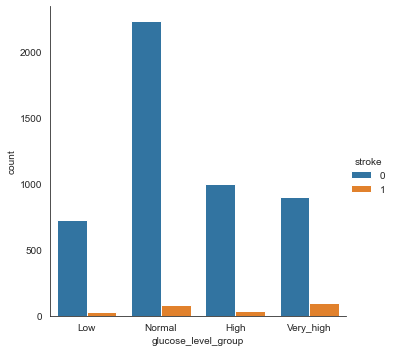

In [42]:
sns.catplot(data=stroke_df,x="glucose_level_group",hue='stroke',kind='count')
sns.set_style('white')
plt.show()

# Preprocessing

In [43]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               5110 non-null   object  
 1   age                  5110 non-null   float64 
 2   hypertension         5110 non-null   int64   
 3   heart_disease        5110 non-null   int64   
 4   ever_married         5110 non-null   object  
 5   work_type            5110 non-null   object  
 6   Residence_type       5110 non-null   object  
 7   avg_glucose_level    5110 non-null   float64 
 8   bmi                  5110 non-null   float64 
 9   smoking_status       5110 non-null   object  
 10  stroke               5110 non-null   int64   
 11  age_group            5110 non-null   category
 12  bmi_group            5110 non-null   category
 13  glucose_level_group  5110 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 454.8+ KB


In [44]:
columns=['gender','ever_married','work_type','Residence_type','smoking_status']

for column in columns:
    unique_values=stroke_df[column].unique()
    print(f"Unique values for {column}:{unique_values}")

Unique values for gender:['Male' 'Female']
Unique values for ever_married:['Yes' 'No']
Unique values for work_type:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values for Residence_type:['Urban' 'Rural']
Unique values for smoking_status:['formerly smoked' 'never smoked' 'smokes' 'Unknown']


# Binary Encoding

In [45]:
#initiate label Encoder
labelencoder=LabelEncoder()

#Binary Encoding (encoding object columns with two unique values)
binary_cols=['ever_married','Residence_type','gender']
for col in binary_cols:
    stroke_df[col]=labelencoder.fit_transform(stroke_df[col])

In [46]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,glucose_level_group
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1,Elderly,Obesity,Very_high
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1,Elderly,Overweight,Very_high
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1,Elderly,Obesity,High
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1,Mid-Adults,Obesity,Very_high
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1,Elderly,Normal,Very_high


# Label Encoding

In [47]:
cat_cols=['age_group','bmi_group','glucose_level_group']
for col in cat_cols:
    stroke_df[col]=labelencoder.fit_transform(stroke_df[col])
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,glucose_level_group
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1,2,1,3
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1,2,2,3
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1,2,1,0
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1,3,1,3
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1,2,0,3


# One-Hot-Encoding

In [48]:
#Encode object columns that are having more than 2 unique values
stroke_df=pd.get_dummies(stroke_df,columns=['work_type','smoking_status'])

In [49]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,...,glucose_level_group,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,2,...,3,False,False,True,False,False,False,True,False,False
1,0,61.0,0,0,1,0,202.21,28.893237,1,2,...,3,False,False,False,True,False,False,False,True,False
2,1,80.0,0,1,1,0,105.92,32.500000,1,2,...,0,False,False,True,False,False,False,False,True,False
3,0,49.0,0,0,1,1,171.23,34.400000,1,3,...,3,False,False,True,False,False,False,False,False,True
4,0,79.0,1,0,1,0,174.12,24.000000,1,2,...,3,False,False,False,True,False,False,False,True,False


In [50]:
#Since as we are seeing above work_type have 5 columns so we can delete one bcz other also reveal the same and similarly in smoke status too
stroke_df.drop(['work_type_Govt_job','smoking_status_Unknown'],axis=1,inplace=True)
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,bmi_group,glucose_level_group,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,2,1,3,False,True,False,False,True,False,False
1,0,61.0,0,0,1,0,202.21,28.893237,1,2,2,3,False,False,True,False,False,True,False
2,1,80.0,0,1,1,0,105.92,32.500000,1,2,1,0,False,True,False,False,False,True,False
3,0,49.0,0,0,1,1,171.23,34.400000,1,3,1,3,False,True,False,False,False,False,True
4,0,79.0,1,0,1,0,174.12,24.000000,1,2,0,3,False,False,True,False,False,True,False


In [51]:
#Also we are having only true and false in dummies of worktype and smoking status so encoding these too
binary_cols=['work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']
for col in binary_cols:
    stroke_df[col]=labelencoder.fit_transform(stroke_df[col])

In [52]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,bmi_group,glucose_level_group,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,2,1,3,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,2,2,3,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,2,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,3,1,3,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,2,0,3,0,0,1,0,0,1,0


In [53]:
stroke_df.shape

(5110, 19)

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>],
       [<AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'age_group'}>,
        <AxesSubplot:title={'center':'bmi_group'}>,
        <AxesSubplot:title={'center':'glucose_level_group'}>],
       [<AxesSubplot:title={'center':'work_type_Never_worked'}>,
        <AxesSubplot:title={'center':'work_type_Private'}>,
        <AxesSubplot:title={'center':'work_type_Self-employed'}>,
        <AxesSubplot:title={'center':'work_type_children'}>],
       [<AxesSubplot:title={'center':'smoking_status_formerly smoked'}>,
        <AxesSubplot:title={'cen

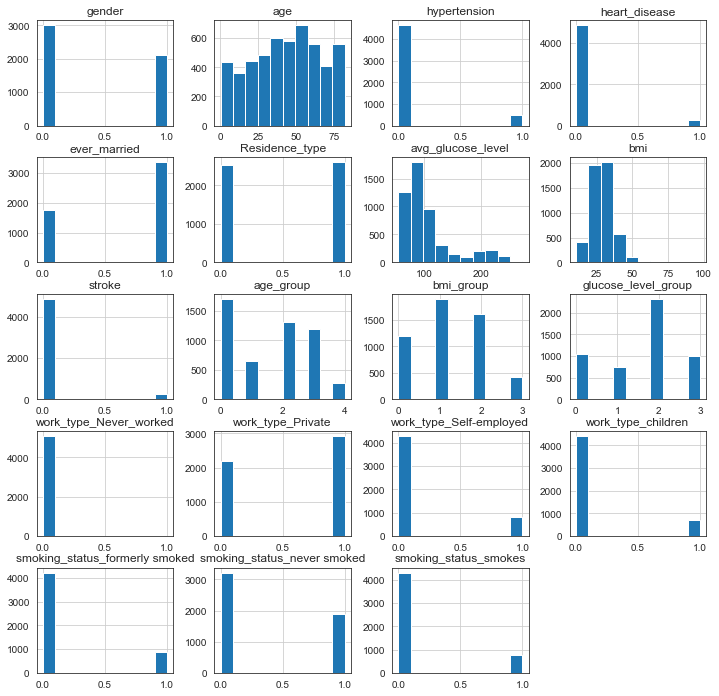

In [54]:
#here as we can see our complete data is encoded
#so we are good to go 
#lets check our EDA once again
stroke_df.hist()

# Model Building

In [55]:
#lets create our feature
X=stroke_df.drop('stroke',axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_group,bmi_group,glucose_level_group,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,2,1,3,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,2,2,3,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,2,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,3,1,3,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,2,0,3,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,2,2,2,0,1,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.000000,2,1,3,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,1,2,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,3,2,3,0,1,0,0,1,0,0


In [57]:
#Create the target variable
y=stroke_df['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [58]:
#split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=None)

In [59]:
(X_train,X_test,y_train,y_test)

(      gender   age  hypertension  heart_disease  ever_married  Residence_type   
 1199       1  64.0             1              0             1               0  \
 2532       1  79.0             0              1             1               1   
 2669       0  53.0             0              0             0               1   
 2651       0  66.0             0              0             1               1   
 2966       1  80.0             1              0             1               0   
 ...      ...   ...           ...            ...           ...             ...   
 3884       1  52.0             0              0             1               1   
 1487       1  60.0             1              1             1               1   
 2963       0  51.0             0              0             1               1   
 3815       0  45.0             0              0             1               1   
 4550       1  11.0             0              0             0               1   
 
       avg_glu

In [60]:
#Normalization
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Deploying the algorithms

1.Logistic Regression

In [62]:
log_reg=LogisticRegression(C=1.0,penalty='l1',solver='saga',class_weight='balanced')
log_reg.fit(X_train_scaled,y_train)
y_pred=log_reg.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [63]:
#lets check for the accuracy score of the log_reg
log_reg_accuracy=accuracy_score(y_test,y_pred)
log_reg_accuracy

0.7309197651663405

In [64]:
#Evaluate and print the train set accuracy
log_reg_train_accuracy=log_reg.score(X_train_scaled,y_train)
log_reg_train_accuracy

0.7120841487279843

In [65]:
#evaluate and print the test set accuracy
log_reg_test_accuracy=log_reg.score(X_test_scaled,y_test)
log_reg_test_accuracy

0.7309197651663405

(2.) Random forest

In [74]:
#predicting using Random Forest
rfc=RandomForestClassifier(max_depth=None,max_features='sqrt',n_estimators=200,random_state=42)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [75]:
#Checking the accuracy score
rfc_accuracy=accuracy_score(y_test,y_pred)
rfc_accuracy

0.9559686888454012

In [76]:
#Evaluate the train set accuracy
rfc_train_accuracy=rfc.score(X_train,y_train)
rfc_train_accuracy

1.0

In [77]:
#Now checking for test set accuracy
rfc_test_accuracy=rfc.score(X_test,y_test)
rfc_test_accuracy

0.9559686888454012

(3.)Decision tree Classifier

In [78]:
#Now lets predict using DecisionTreeClassifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=8,min_samples_leaf=3,min_samples_split=2,random_state=0)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [81]:
#Now checking for the accuracy score of above classifier
dt_accuracy=accuracy_score(y_test,y_pred)
dt_accuracy

0.9461839530332681

In [82]:
#Evaluate the train set accuracy
dt_train_accuracy=dt.score(X_train,y_train)
dt_train_accuracy

0.9576810176125244

In [83]:
#evalute the test accuracy
dt_test_accuracy=dt.score(X_test,y_test)
dt_test_accuracy

0.9461839530332681

In [86]:
features_imp_df=pd.DataFrame({
    'Features Name':X_train.columns,
    'Importance':dt.feature_importances_
})
sorted_feature_imp=features_imp_df.sort_values(by='Importance',ascending=False)
top10_feature_imp=sorted_feature_imp.head(10)
top10_feature_imp

,Features Name,Importance
1,age,0.309319
7,bmi,0.210763
6,avg_glucose_level,0.209497
4,ever_married,0.049091
15,smoking_status_formerly smoked,0.039643
13,work_type_Self-employed,0.036906
3,heart_disease,0.035849
5,Residence_type,0.027692
16,smoking_status_never smoked,0.023546
0,gender,0.021155


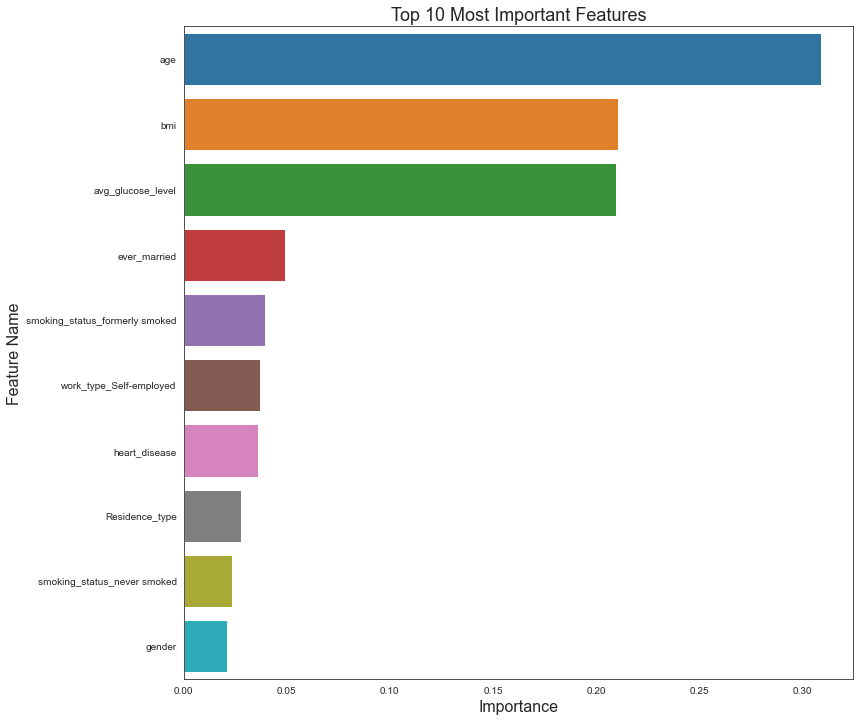

In [88]:
#lets visualise the features importance
sns.barplot(data=top10_feature_imp,x='Importance',y='Features Name')
plt.title('Top 10 Most Important Features',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name',fontsize=16)
plt.show()

In [93]:
#Lets compare the accuracy of our three models(calssifiers)
data={'classifier':['Logistic Regression','Random_Forest','DecisionTreeClassifier'],
     '%Training Accuracy':[log_reg_train_accuracy*100,rfc_train_accuracy*100,dt_train_accuracy*100],
     '%Test Accuracy':[log_reg_test_accuracy*100,rfc_test_accuracy*100,dt_test_accuracy*100],
     'Model Accuracy':[log_reg_accuracy*100,rfc_accuracy*100,dt_accuracy*100]
     }
df=pd.DataFrame(data)
df

,classifier,%Training Accuracy,%Test Accuracy,Model Accuracy
0,Logistic Regression,71.208415,73.091977,73.091977
1,Random_Forest,100.000000,95.596869,95.596869
2,DecisionTreeClassifier,95.768102,94.618395,94.618395


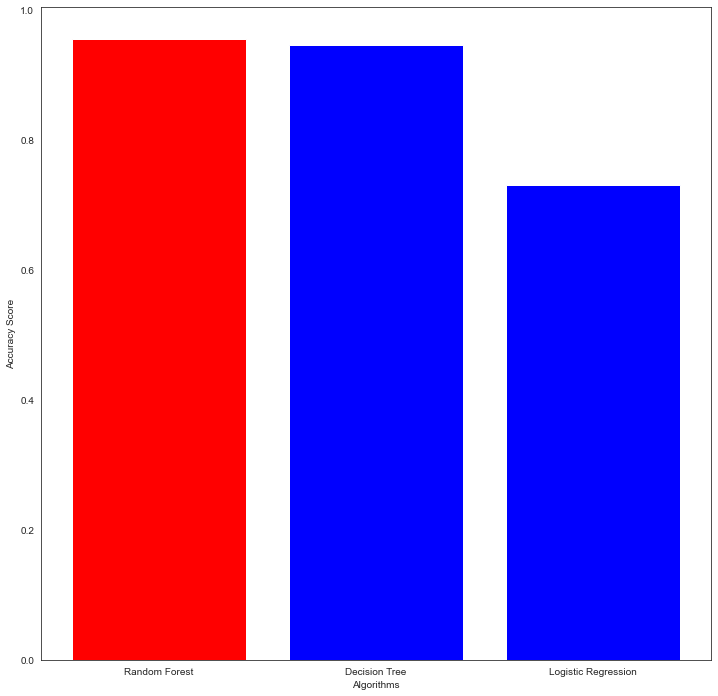

In [94]:
#Now lets visualise the above comaprison
models=['Random Forest','Decision Tree','Logistic Regression']
accuracy=[rfc_accuracy,dt_accuracy,log_reg_accuracy]
plt.bar(models,accuracy,color=['red','blue','blue','green'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()